In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import time
%matplotlib inline
# plt.style.use('dark_background')

In [2]:
data = pd.read_table('data/bulls.dat')
data.head()

,breed,sale_price,yearling_height,fat_free_body,per_fat_free,frame_size,back_fat,shoulder_height,weight
0,1,2200,51.0,1128,70.9,7,0.25,54.8,1720
1,1,2250,51.9,1108,72.1,7,0.25,55.3,1575
2,1,1625,49.9,1011,71.6,6,0.15,53.1,1410
3,1,4600,53.1,993,68.9,8,0.35,56.4,1595
4,1,2150,51.2,996,68.6,7,0.25,55.0,1488


In [3]:
bull_mat = np.array([data['breed'], data['weight'], data['sale_price'], data['frame_size']]).T
np.random.shuffle(bull_mat)

train_X = bull_mat[:-10, 1:]
train_y = bull_mat[:-10, 0:1]

test_X = bull_mat[-10:, 1:]
test_y = bull_mat[-10:, 0:1]

In [4]:
mdl = DecisionTreeClassifier()
mdl.fit(train_X, train_y)
y_hat = mdl.predict(test_X)

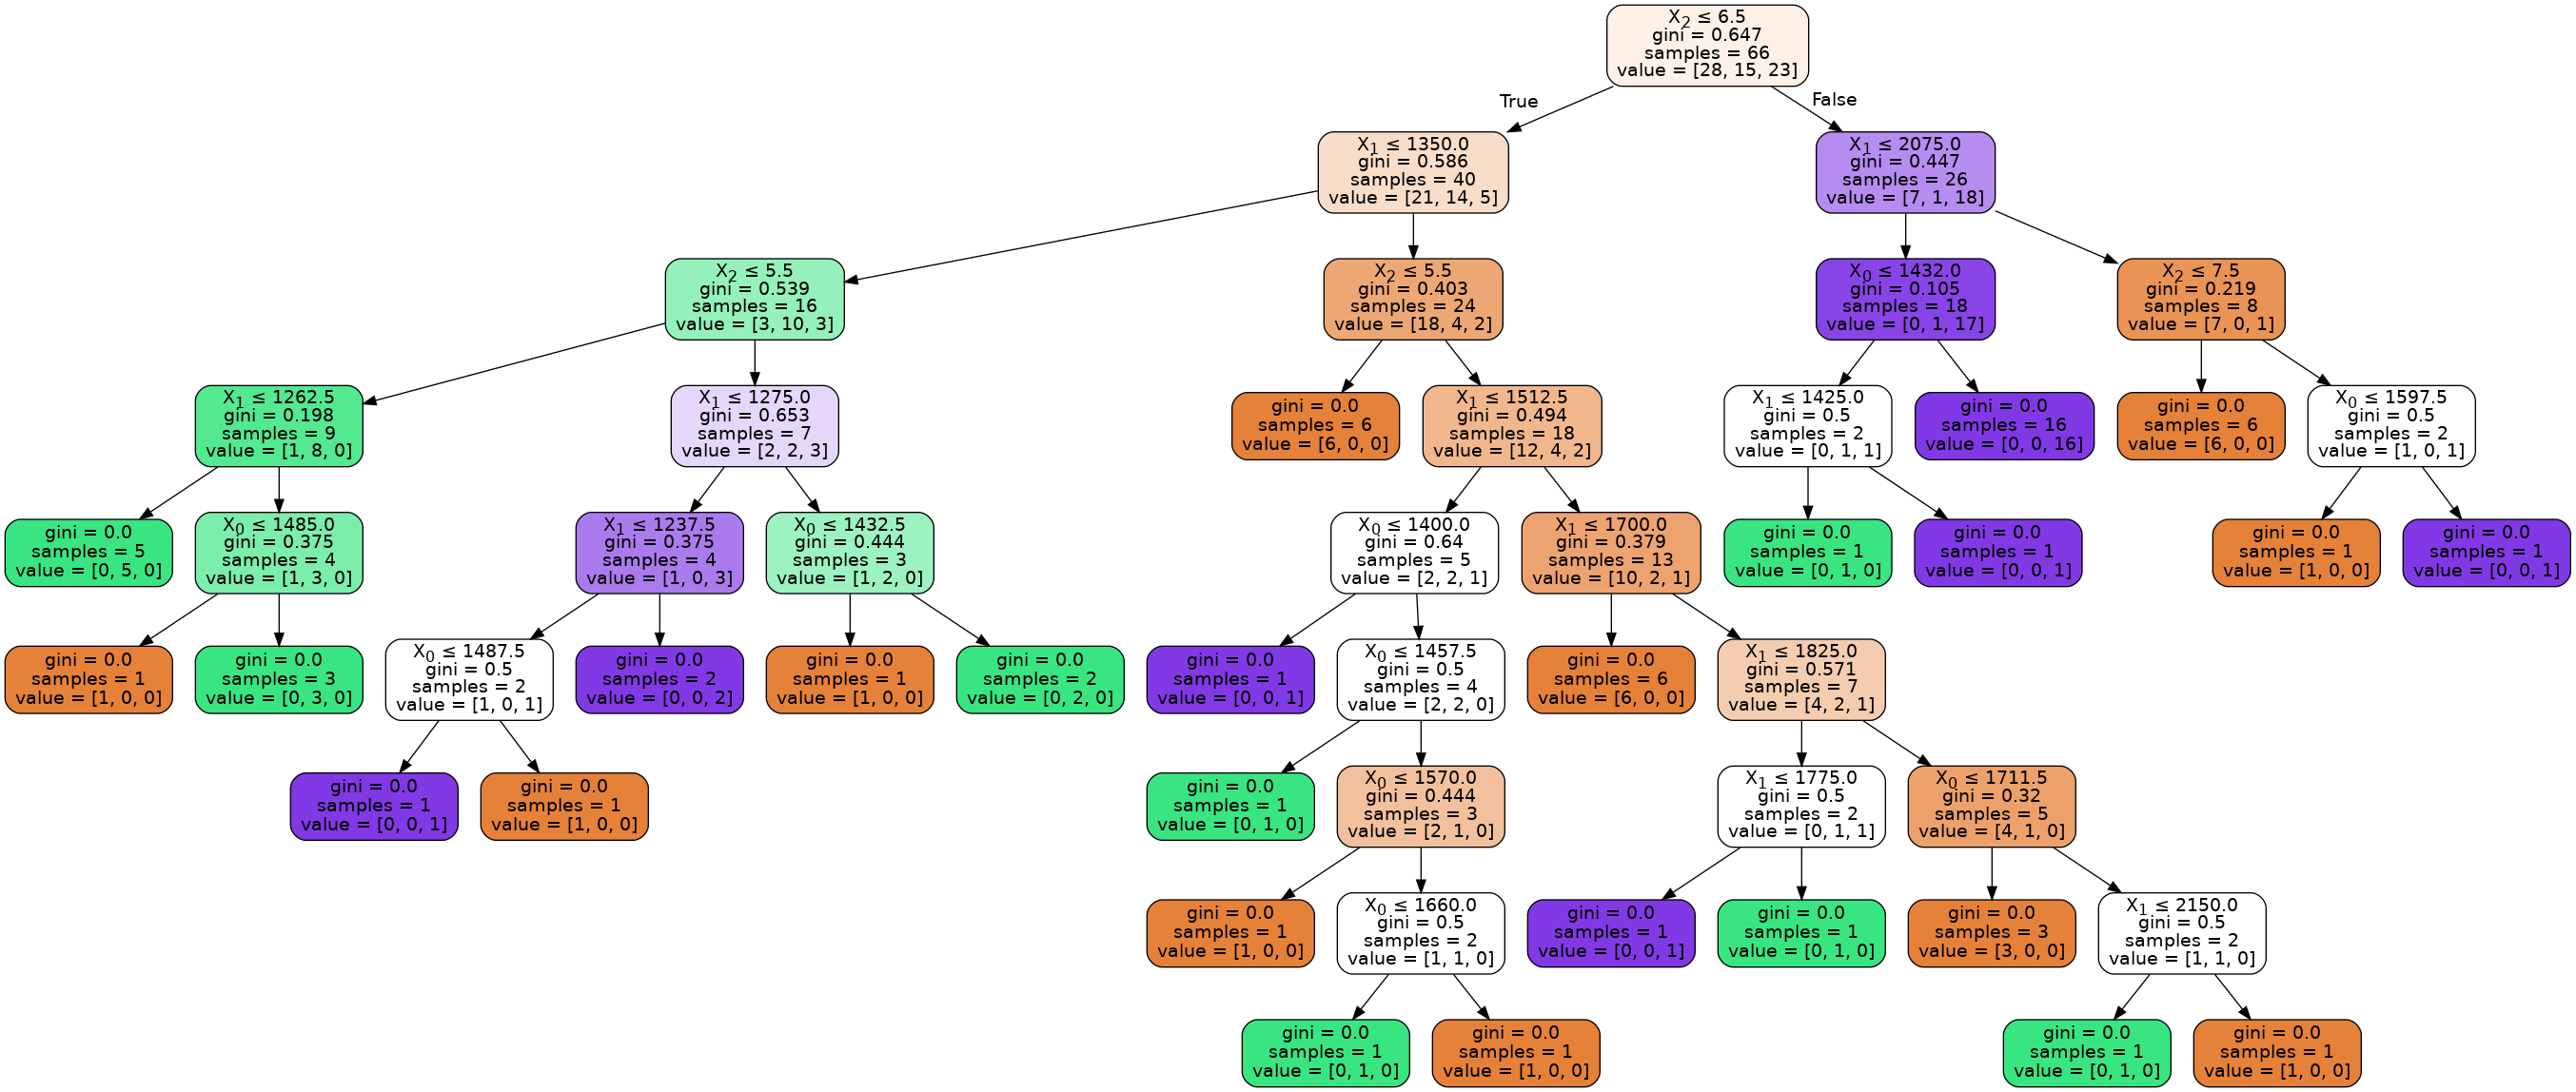

In [6]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(mdl, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())